<h1><center><b>Exploratory Data Analysis</b></center></h1>


In [1]:
!pip install spacy==3.6.0
!pip install nltk

In [2]:
import pandas as pd 
import csv
import re
print("--------------------------------------------Import 1-------------------------------------------------------------------")
# For visualizations
import matplotlib.pyplot as plt
#import waffle 
print("--------------------------------------------Import 2-------------------------------------------------------------------")
# For handling string
import string
import spacy 
# For performing mathematical operations
import math

print("--------------------------------------------Import 3-------------------------------------------------------------------")
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

print("--------------------------------------------Import 4-------------------------------------------------------------------")
import nltk
# Download the VADER lexicon
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')


--------------------------------------------Import 1-------------------------------------------------------------------
--------------------------------------------Import 2-------------------------------------------------------------------


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


--------------------------------------------Import 3-------------------------------------------------------------------
--------------------------------------------Import 4-------------------------------------------------------------------


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('BA_reviews.csv')

In [4]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)
df.head()

,Date,Reviews,Rating,Location
0,2023-08-13,Easy check in a T5. Galleries south and North ...,8.0,United Kingdom
1,2023-08-12,"Flight delayed by an hour, it happens, no bigg...",2.0,United States
2,2023-08-11,The staff are very rude and not trained proper...,2.0,United Kingdom
3,2023-08-08,Good domestic flight operated by BA Cityflyer....,10.0,United Kingdom
4,2023-08-08,Failed at all basic travel fundamentals: 1) Ou...,1.0,Canada


In [5]:
df.shape

(3610, 4)

In [6]:
#Checking for null values 
df.isnull().sum()

Date        0
Reviews     0
Rating      6
Location    2
dtype: int64

In [7]:
#Dropping the null values from the data set
df.dropna(inplace=True)
df.isnull().sum()

Date        0
Reviews     0
Rating      0
Location    0
dtype: int64

In [8]:
#LowerCase the reviews 
df['Reviews'] = df['Reviews'].apply(lambda x: x.lower())

#Remove digits and words containing digits
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['Rating'] = df['Rating'].round(0)

#Removing Puntuations 
df['Reviews']=df['Reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [9]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['Reviews'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))



In [10]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

filtered_sentence = []

# Iterate through each row in the 'lemmatized' column
for lemmatized_text in df['lemmatized']:
    # Tokenize the lemmatized text into words
    word_tokens = word_tokenize(lemmatized_text)
    
    # Filter out stop words
    filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
    
    # Append the filtered words to the result list
    filtered_sentence.append(filtered_words)

#Word frequency
frequent_words_count = df['lemmatized'].str.lower().str.split().explode().value_counts()[:50]
frequent_words_count

flight        7616
seat          4580
ba            4408
service       2896
fly           2397
good          2389
time          2353
food          2309
crew          2165
london        2146
british       2100
cabin         1985
not           1862
class         1844
hour          1783
airline       1648
airways       1645
staff         1557
business      1512
heathrow      1496
economy       1400
passenger     1271
return        1239
check         1225
drink         1183
plane         1127
meal          1126
lounge        1088
offer         1072
club          1071
experience    1047
pay           1038
review         957
delay          947
new            924
boarding       917
customer       911
serve          907
get            897
tell           891
bag            883
long           845
aircraft       834
travel         816
day            807
like           803
give           781
ask            779
minute         778
go             773
Name: lemmatized, dtype: int64

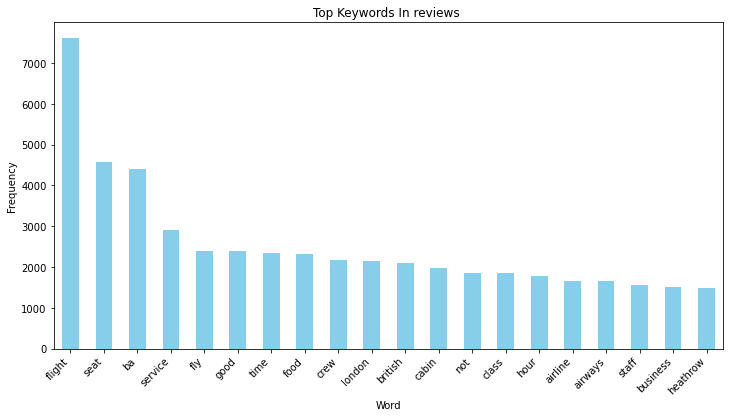

In [19]:
# Plot the bar chart
frequent_words_count_1 = df['lemmatized'].str.lower().str.split().explode().value_counts()[:20]
plt.figure(figsize=(12, 6))
frequent_words_count_1.plot(kind='bar', color='skyblue')
plt.title('Top Keywords In reviews ')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

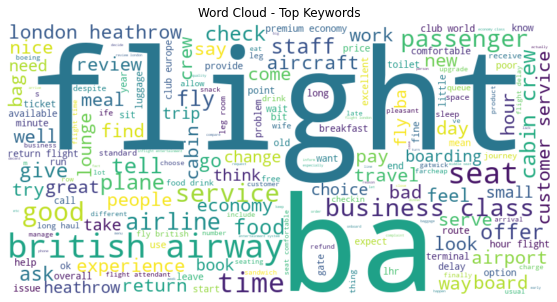

In [12]:
from PIL import Image
text_data = " ".join(review for review in df['lemmatized'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text_data)

plt.figure(figsize=(10 , 5))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - Top Keywords')
plt.show()



In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Add a new column 'Sentiment' to store sentiment scores
df['Sentiment'] = df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Map sentiment scores to labels (positive, neutral, negative)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# Display the DataFrame with sentiment information
df.head()


,Date,Reviews,Rating,Location,lemmatized,Sentiment,Sentiment_Label
0,2023-08-13,easy check in a galleries south and north lou...,8.0,United Kingdom,easy check gallery south north lounge pack a...,0.9469,positive
1,2023-08-12,flight delayed by an hour it happens no biggie...,2.0,United States,flight delay hour happen biggie change gate ai...,0.5719,positive
2,2023-08-11,the staff are very rude and not trained proper...,2.0,United Kingdom,staff rude train properly exception child elde...,-0.3410,negative
3,2023-08-08,good domestic flight operated by ba cityflyer ...,10.0,United Kingdom,good domestic flight operate ba cityflyer grou...,0.9419,positive
4,2023-08-08,failed at all basic travel fundamentals our f...,1.0,Canada,fail basic travel fundamental flight delay ...,-0.9019,negative


In [14]:
df.describe()

,Rating,Sentiment
count,3602.000000,3602.000000
mean,4.775958,0.180614
std,3.178666,0.770454
min,1.000000,-0.997300
25%,2.000000,-0.706275
50%,4.000000,0.500350
75%,8.000000,0.929650
max,10.000000,0.999200


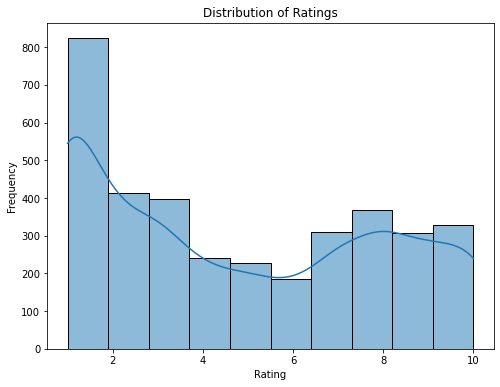

In [15]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

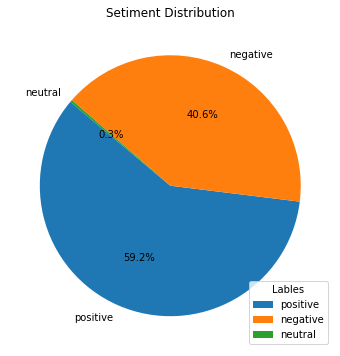

In [16]:
plt.figure(figsize=(10, 6))

sentiment_label_count = df['Sentiment_Label'].value_counts()

# Assigning the values for each record
labels = sentiment_label_count.index
values = sentiment_label_count.values

plt.pie(sentiment_label_count, labels=labels,autopct='%1.1f%%', startangle=140)
plt.title('Setiment Distribution')
plt.legend(title="Lables",loc='lower right')

plt.show()

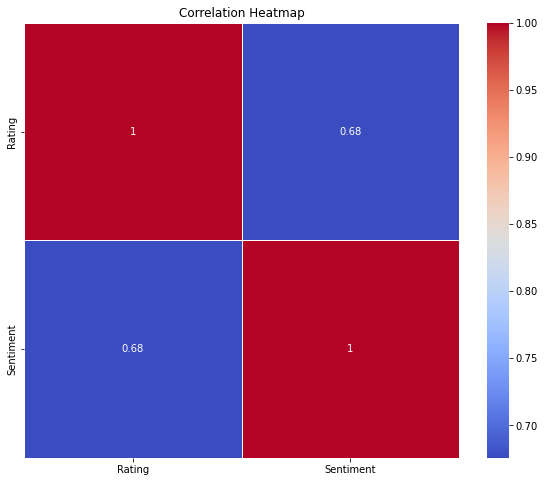

In [17]:
#calculating correlation metrix for sentiment against Rating
corr_matrix =df[['Rating', 'Sentiment']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

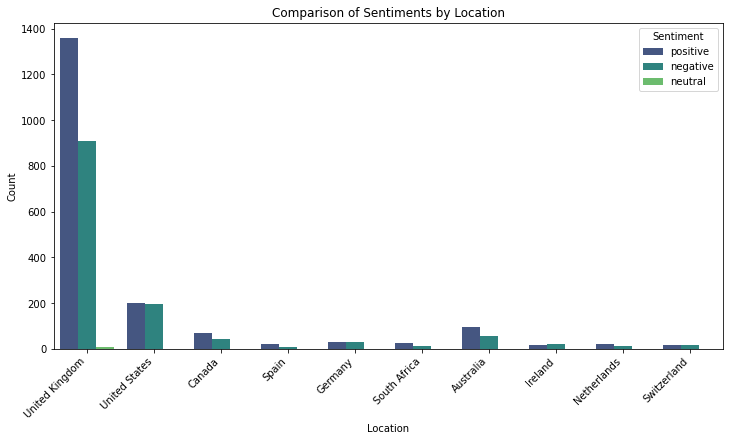

In [18]:
# Step 1: Filter data for top 10 countries
top_countries = df['Location'].value_counts().head(10).index
df_top_countries = df[df['Location'].isin(top_countries)]

# Create a bar plot to compare sentiments by location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Sentiment_Label', data=df_top_countries, palette='viridis')
plt.title('Comparison of Sentiments by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()
